In [1]:
import scipy.linalg
import scipy.optimize
import sys
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
def result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type):
    dist_prism_all = []
    dist_separate = []
    for i,j,k in zip(Inter_distance, file_name_marker, file_name_path):
        _, _, _, T_1, T_2, T_3 = tfu.read_marker_file(j, 1, 1)
        trimble_1 = ttfu.read_prediction_data_resection_csv_file(k+path_type+path_file_type+"1.csv")
        trimble_2 = ttfu.read_prediction_data_resection_csv_file(k+path_type+path_file_type+"2.csv")
        trimble_3 = ttfu.read_prediction_data_resection_csv_file(k+path_type+path_file_type+"3.csv")
        if(len(np.array(trimble_1)) > 0 and len(np.array(trimble_2)) > 0 and len(np.array(trimble_3)) > 0):
            p1 = np.array(trimble_1)[:,1:5]
            p2 = np.array(trimble_2)[:,1:5]
            p3 = np.array(trimble_3)[:,1:5]
            p1t = T_1@p1.T
            p2t = T_2@p2.T
            p3t = T_3@p3.T
            dist = []
            for t1,t2,t3 in zip(p1t.T,p2t.T,p3t.T):
                dp12 = abs(np.linalg.norm(t1[0:3]-t2[0:3])-i[0])*1000
                dp13 = abs(np.linalg.norm(t1[0:3]-t3[0:3])-i[1])*1000
                dp23 = abs(np.linalg.norm(t2[0:3]-t3[0:3])-i[2])*1000
                dist.append(dp12)
                dist.append(dp13)
                dist.append(dp23)
                dist_prism_all.append(dp12)
                dist_prism_all.append(dp13)
                dist_prism_all.append(dp23)
            dist_separate.append(dist)
        else:
            print("No data in file(s) "+k+"  !!")
    print("Results done !")
    dist_prism_all = np.array(dist_prism_all)
    return dist_prism_all, dist_separate

In [3]:
# 17 02 2022 / 24 02 2022
Dist_prism_12_240222 = 0.8882613537922258
Dist_prism_13_240222 = 0.8262903370535766
Dist_prism_23_240222 = 1.0377436460567973
Dist_GPS_12_240222 = 0.7809786915630756
Dist_GPS_13_240222 = 0.8378323585433202
Dist_GPS_23_240222 = 0.5191788936274444   

# 07 03 2022
Dist_prism_12_070322 = 0.8832836583456264
Dist_prism_13_070322 = 0.8247449387008166
Dist_prism_23_070322 = 1.039409793600046
Dist_GPS_12_070322 = 0.7781099344563802
Dist_GPS_13_070322 = 0.8431026980109139
Dist_GPS_23_070322 = 0.5157221841320069

# 12 03 2022
Dist_prism_12_120322 = 0.8860734460339026
Dist_prism_13_120322 = 0.8303896290142598
Dist_prism_23_120322 = 1.0393117663247973
Dist_GPS_12_120322 = 0.7829424296161074
Dist_GPS_13_120322 = 0.8415176433032493
Dist_GPS_23_120322 = 0.5161917038941966

# 14 03 2022 / 16 03 2022
Dist_prism_12_140322 = 0.8873171656784946
Dist_prism_13_140322 = 0.8272212117473343
Dist_prism_23_140322 = 1.0379270641796363
Dist_GPS_12_140322 = 0.7829081036179948
Dist_GPS_13_140322 = 0.8424633975958637
Dist_GPS_23_140322 = 0.5165807364575292

# 31 03 2022
Dist_prism_12_310322 = 0.8873171656784946
Dist_prism_13_310322 = 0.8272212117473343
Dist_prism_23_310322 = 1.0379270641796363
Dist_GPS_12_310322 = 0.7829081036179948
Dist_GPS_13_310322 = 0.8424633975958637
Dist_GPS_23_310322 = 0.5165807364575292

# 27 04 2022
Dist_prism_12_270422 = 0.8856608085851714
Dist_prism_13_270422 = 0.8264452483880412
Dist_prism_23_270422 = 1.0384219210289538
Dist_GPS_12_270422 = 0.7809547832390561
Dist_GPS_13_270422 = 0.8259590286006459
Dist_GPS_23_270422 = 0.5191274645630007  

# 27 04 2022 soir
Dist_prism_12_270422_soir = 0.8868846942534616
Dist_prism_13_270422_soir = 0.829169129877633
Dist_prism_23_270422_soir = 1.0387571594276301
Dist_GPS_12_270422_soir = 0.7837749633840095
Dist_GPS_13_270422_soir = 0.8323125081688734
Dist_GPS_23_270422_soir = 0.5187055120945835

# 05 05 2022
Dist_prism_12_050522 = 0.3819811991689936
Dist_prism_13_050522 = 0.4426382054042266
Dist_prism_23_050522 = 0.2564685508415531

# 13 05 2022
Dist_prism_12_130522 = 0.8113569618671205
Dist_prism_13_130522 = 0.8695313906832193
Dist_prism_23_130522 = 1.0383292631343506
Dist_GPS_12_130522 = 0.7800801192552722
Dist_GPS_13_130522 = 0.8396027021467387
Dist_GPS_23_130522 = 0.5157656903777014

# 23 05 2022
Dist_prism_12_230522 = 0.3851913749758221
Dist_prism_13_230522 = 0.4433899497583272
Dist_prism_23_230522 = 0.25861327466684897

# 25 05 2022
Dist_prism_12_250522 = 0.9095421527752512
Dist_prism_13_250522 = 0.7356677023921305
Dist_prism_23_250522 = 1.0283049452358466

# 22 06 2022
Dist_prism_12_220622 = 0.7359204697527427
Dist_prism_13_220622 = 0.9055056357941131
Dist_prism_23_220622 = 1.0268390664025775

# 30 06 2022
Dist_prism_12_300622 = 0.7297583705742492
Dist_prism_13_300622 = 0.9060320633355149
Dist_prism_23_300622 = 1.0319114860615324

# 11 07 2022
Dist_prism_12_110722 = 0.7290056530579362
Dist_prism_13_110722 = 0.906995998154099
Dist_prism_23_110722 = 1.029264651249632

# 17 07 2022
Dist_prism_12_170722 = 0.39002864329744197 
Dist_prism_13_170722 = 0.4452628757931205 
Dist_prism_23_170722 = 0.2597453130254009

Inter_distance = [[Dist_prism_12_240222,Dist_prism_13_240222,Dist_prism_23_240222,Dist_GPS_12_240222,Dist_GPS_13_240222,Dist_GPS_23_240222],
                  [Dist_prism_12_070322,Dist_prism_13_070322,Dist_prism_23_070322,Dist_GPS_12_070322,Dist_GPS_13_070322,Dist_GPS_23_070322],
                  #[Dist_prism_12_120322,Dist_prism_13_120322,Dist_prism_23_120322,Dist_GPS_12_120322,Dist_GPS_13_120322,Dist_GPS_23_120322],
                  [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                  [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                  [Dist_prism_12_310322,Dist_prism_13_310322,Dist_prism_23_310322,Dist_GPS_12_310322,Dist_GPS_13_310322,Dist_GPS_23_310322],
                  [Dist_prism_12_310322,Dist_prism_13_310322,Dist_prism_23_310322,Dist_GPS_12_310322,Dist_GPS_13_310322,Dist_GPS_23_310322],
                  #[Dist_prism_12_270422,Dist_prism_13_270422,Dist_prism_23_270422,Dist_GPS_12_270422,Dist_GPS_13_270422,Dist_GPS_23_270422],
                  [Dist_prism_12_050522,Dist_prism_13_050522,Dist_prism_23_050522],
                  [Dist_prism_12_050522,Dist_prism_13_050522,Dist_prism_23_050522],
                  [Dist_prism_12_130522,Dist_prism_13_130522,Dist_prism_23_130522,Dist_GPS_12_130522,Dist_GPS_13_130522,Dist_GPS_23_130522],
                  [Dist_prism_12_130522,Dist_prism_13_130522,Dist_prism_23_130522,Dist_GPS_12_130522,Dist_GPS_13_130522,Dist_GPS_23_130522],
                  [Dist_prism_12_130522,Dist_prism_13_130522,Dist_prism_23_130522,Dist_GPS_12_130522,Dist_GPS_13_130522,Dist_GPS_23_130522],
                  #[Dist_prism_12_130522,Dist_prism_13_130522,Dist_prism_23_130522,Dist_GPS_12_130522,Dist_GPS_13_130522,Dist_GPS_23_130522],
                  [Dist_prism_12_130522,Dist_prism_13_130522,Dist_prism_23_130522,Dist_GPS_12_130522,Dist_GPS_13_130522,Dist_GPS_23_130522],
                  [Dist_prism_12_130522,Dist_prism_13_130522,Dist_prism_23_130522,Dist_GPS_12_130522,Dist_GPS_13_130522,Dist_GPS_23_130522],               
                  [Dist_prism_12_230522,Dist_prism_13_230522,Dist_prism_23_230522],
                  [Dist_prism_12_230522,Dist_prism_13_230522,Dist_prism_23_230522],
                  [Dist_prism_12_230522,Dist_prism_13_230522,Dist_prism_23_230522],
                  [Dist_prism_12_230522,Dist_prism_13_230522,Dist_prism_23_230522],
                  [Dist_prism_12_250522,Dist_prism_13_250522,Dist_prism_23_250522],
                  [Dist_prism_12_250522,Dist_prism_13_250522,Dist_prism_23_250522],
                  [Dist_prism_12_220622,Dist_prism_13_220622,Dist_prism_23_220622],
                  [Dist_prism_12_220622,Dist_prism_13_220622,Dist_prism_23_220622],
                  [Dist_prism_12_300622,Dist_prism_13_300622,Dist_prism_23_300622],
                  [Dist_prism_12_300622,Dist_prism_13_300622,Dist_prism_23_300622],
                  [Dist_prism_12_110722,Dist_prism_13_110722,Dist_prism_23_110722],
                  [Dist_prism_12_110722,Dist_prism_13_110722,Dist_prism_23_110722],
                  [Dist_prism_12_170722,Dist_prism_13_170722,Dist_prism_23_170722],
                  [Dist_prism_12_170722,Dist_prism_13_170722,Dist_prism_23_170722],
                  [Dist_prism_12_170722,Dist_prism_13_170722,Dist_prism_23_170722],
                  [Dist_prism_12_170722,Dist_prism_13_170722,Dist_prism_23_170722]
                 ]

file_name_marker = [
                    './data/total_station/20220224/20220224_theodolite_reference_prisms.txt',
                    './data/total_station/20220307/theodolite_reference_prisms.txt',
                    #'./data/total_station/20220312/theodolite_reference_prisms.txt',
                    './data/total_station/20220314/theodolite_reference_prisms.txt',
                    './data/total_station/20220316/theodolite_reference_prisms.txt',
                    './data/total_station/20220331-1/theodolite_reference_prisms.txt',
                    './data/total_station/20220331-2/theodolite_reference_prisms.txt',
                    #'./data/total_station/20220427/theodolite_reference_prisms.txt',
                    './data/total_station/20220505_empty/theodolite_reference_prisms.txt',
                    './data/total_station/20220505_cones/theodolite_reference_prisms.txt',
                    './data/total_station/20220513_morning_lidar/theodolite_reference_prisms.txt',
                    './data/total_station/20220513_morning_without_lidar_1/theodolite_reference_prisms.txt',
                    './data/total_station/20220513_morning_without_lidar_2/theodolite_reference_prisms.txt',
                    #'./data/total_station/20220513_evening_lidar/theodolite_reference_prisms.txt',
                    './data/total_station/20220513_evening_without_lidar_1/theodolite_reference_prisms.txt',
                    './data/total_station/20220513_evening_without_lidar_2/theodolite_reference_prisms.txt',
                    './data/total_station/20220523_cones/theodolite_reference_prisms.txt',
                    './data/total_station/20220523_constrained/theodolite_reference_prisms.txt',
                    './data/total_station/20220523_empty/theodolite_reference_prisms.txt',
                    './data/total_station/20220523_other_tunnel/theodolite_reference_prisms.txt',
                    './data/total_station/20220525/theodolite_reference_prisms.txt',
                    './data/total_station/20220525/theodolite_reference_prisms.txt',
                    './data/total_station/20220622-1/theodolite_reference_prisms_2.txt',
                    './data/total_station/20220622-2/theodolite_reference_prisms_2.txt',
                    './data/total_station/20220630-1/theodolite_reference_prisms_without_first_two.txt',
                    './data/total_station/20220630-2/theodolite_reference_prisms_without_first_two.txt',
                    './data/total_station/20220711/theodolite_reference_prisms_all.txt',
                    './data/total_station/20220711/theodolite_reference_prisms_all.txt',
                    './data/total_station/20220717/theodolite_reference_prisms.txt',
                    './data/total_station/20220717/theodolite_reference_prisms.txt',
                    './data/total_station/20220717/theodolite_reference_prisms.txt',
                    './data/total_station/20220717/theodolite_reference_prisms.txt'
]

file_name_path = ['./data/prediction/TS/20220224/',
                './data/prediction/TS/20220307/',
                #'./data/prediction/TS/20220312/',
                './data/prediction/TS/20220314/',
                './data/prediction/TS/20220316/',
                './data/prediction/TS/20220331-1/',
                './data/prediction/TS/20220331-2/',
                #'./data/prediction/TS/20220427/',
                './data/prediction/TS/20220505_empty/',
                './data/prediction/TS/20220505_cones/',
                './data/prediction/TS/20220513/01/',
                './data/prediction/TS/20220513/02/',
                './data/prediction/TS/20220513/03/',
                #'./data/prediction/TS/20220513/04/',
                './data/prediction/TS/20220513/05/',
                './data/prediction/TS/20220513/06/',
                './data/prediction/TS/20220523_cones/',
                './data/prediction/TS/20220523_constrained/',
                './data/prediction/TS/20220523_empty/',
                './data/prediction/TS/20220523_other_tunnel/',
                './data/prediction/TS/20220525/01/',
                './data/prediction/TS/20220525/02/',
                './data/prediction/TS/20220622-1/',
                './data/prediction/TS/20220622-2/',
                './data/prediction/TS/20220630-1/',
                './data/prediction/TS/20220630-2/',
                './data/prediction/TS/20220711/01/',
                './data/prediction/TS/20220711/02/',
                './data/prediction/TS/20220717/02/',
                './data/prediction/TS/20220717/03/',
                './data/prediction/TS/20220717/04/',
                './data/prediction/TS/20220717/05/'
                 ]


In [4]:
ttfu = importlib.reload(ttfu)

# Pre-filtering on distance analysis L
result_sigma_r = []

#path_type = 'raw/'
#path_file_type = 'nf-1-6-0-L_'
#dist_prism_raw_all, dist_separate = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type)
#result.append(dist_prism_raw_all)

path_type = 'filtered/'
path_file_type = ['f-0.5-1-1-1-6-0-L_',
                  'f-1-1-1-1-6-0-L_',
                  'f-1.5-1-1-1-6-0-L_',
                  'f-2-1-1-1-6-0-L_',
                  'f-2.5-1-1-1-6-0-L_',
                  'f-3-1-1-1-6-0-L_',
                  ]

for i in path_file_type:
    print(i)
    dist_prism_filtered_all, dist_separate = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result_sigma_r.append(dist_prism_filtered_all)

f-0.5-1-1-1-6-0-L_
No data in file(s) ./data/prediction/TS/20220523_other_tunnel/  !!
No data in file(s) ./data/prediction/TS/20220717/05/  !!
Results done !
f-1-1-1-1-6-0-L_
Results done !
f-1.5-1-1-1-6-0-L_
Results done !
f-2-1-1-1-6-0-L_
Results done !
f-2.5-1-1-1-6-0-L_
Results done !
f-3-1-1-1-6-0-L_
Results done !


In [ ]:
# Creating dataset
fig = plt.figure(figsize =(9, 4))
ax = fig.add_subplot(111)

result= result_sigma_r
box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6], ["D 0.5 \n\n M: "+str(round(np.median(result[0]),2))+"mm \n Std: "+str(round(np.std(result[0]),2))+"mm",
                             "D 1 \n\n M: "+str(round(np.median(result[1]),2))+"mm \n Std: "+str(round(np.std(result[1]),2))+"mm",
                             "D 1.5 \n\n M: "+str(round(np.median(result[2]),2))+"mm \n Std: "+str(round(np.std(result[2]),2))+"mm",
                             "D 2 \n\n M: "+str(round(np.median(result[3]),2))+"mm \n Std: "+str(round(np.std(result[3]),2))+"mm",
                             "D 2.5 \n\n M: "+str(round(np.median(result[4]),2))+"mm \n Std: "+str(round(np.std(result[4]),2))+"mm",
                             "D 3 \n\n Median: "+str(round(np.median(result[5]),2))+"mm \n Std: "+str(round(np.std(result[5]),2))+"mm"])
colors_box = ['#069AF3', '#069AF3','#069AF3', '#069AF3','#069AF3', '#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]")
fig.tight_layout()
plt.show()
#fig.savefig("./figs/comparison_error_distance-f-n-1-1-1-6-0-L.jpg")

In [5]:
ttfu = importlib.reload(ttfu)

# Pre-filtering on azimuth angle analysis L
result_sigma_azimuth = []

#path_type = 'raw/'
#path_file_type = 'nf-1-6-0-L_'
#dist_prism_raw_all, dist_separate = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type)
#result.append(dist_prism_raw_all)

path_type = 'filtered/'
path_file_type = ['f-1-0.5-1-1-6-0-L_',
                  'f-1-1-1-1-6-0-L_',
                  'f-1-1.5-1-1-6-0-L_',
                  'f-1-2-1-1-6-0-L_',
                  'f-1-2.5-1-1-6-0-L_',
                  'f-1-3-1-1-6-0-L_',
                  ]

for i in path_file_type:
    print(i)
    dist_prism_filtered_all, dist_separate = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result_sigma_azimuth.append(dist_prism_filtered_all)

f-1-0.5-1-1-6-0-L_
Results done !
f-1-1-1-1-6-0-L_
Results done !
f-1-1.5-1-1-6-0-L_
Results done !
f-1-2-1-1-6-0-L_
Results done !
f-1-2.5-1-1-6-0-L_
Results done !
f-1-3-1-1-6-0-L_
Results done !


In [ ]:
# Creating dataset
fig = plt.figure(figsize =(9, 4))
ax = fig.add_subplot(111)
result = result_sigma_azimuth

box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6], ["A 0.5 \n\n M: "+str(round(np.median(result[0]),2))+"mm \n Std: "+str(round(np.std(result[0]),2))+"mm",
                   "A 1 \n\n M: "+str(round(np.median(result[1]),2))+"mm \n Std: "+str(round(np.std(result[1]),2))+"mm",
                   "A 1.5 \n\n M: "+str(round(np.median(result[2]),2))+"mm \n Std: "+str(round(np.std(result[2]),2))+"mm",
                   "A 2 \n\n M: "+str(round(np.median(result[3]),2))+"mm \n Std: "+str(round(np.std(result[3]),2))+"mm",
                   "A 2.5 \n\n M: "+str(round(np.median(result[4]),2))+"mm \n Std: "+str(round(np.std(result[4]),2))+"mm",
                   "A 3 \n\n M: "+str(round(np.median(result[5]),2))+"mm \n Std: "+str(round(np.std(result[5]),2))+"mm"
])
colors_box = ['#069AF3', '#069AF3','#069AF3', '#069AF3','#069AF3', '#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]")
fig.tight_layout()
plt.show()
#fig.savefig("./figs/comparison_error_azimuth_angle-f-2-n-1-1-6-0-L.jpg")

In [6]:
ttfu = importlib.reload(ttfu)

# Pre-filtering on elevation angle analysis L
result_sigma_elevation = []

#path_type = 'raw/'
#path_file_type = 'nf-1-6-0-L_'
#dist_prism_raw_all, dist_separate = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type)
#result.append(dist_prism_raw_all)

path_type = 'filtered/'
path_file_type = ['f-1-1-0.5-1-6-0-L_',
                  'f-1-1-1-1-6-0-L_',
                  'f-1-1-1.5-1-6-0-L_',
                  'f-1-1-2-1-6-0-L_',
                  'f-1-1-2.5-1-6-0-L_',
                  'f-1-1-3-1-6-0-L_',
                  ]

for i in path_file_type:
    print(i)
    dist_prism_filtered_all, dist_separate = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result_sigma_elevation.append(dist_prism_filtered_all)

f-1-1-0.5-1-6-0-L_
Results done !
f-1-1-1-1-6-0-L_
Results done !
f-1-1-1.5-1-6-0-L_
Results done !
f-1-1-2-1-6-0-L_
Results done !
f-1-1-2.5-1-6-0-L_
Results done !
f-1-1-3-1-6-0-L_
Results done !


In [ ]:
# Creating dataset
fig = plt.figure(figsize =(9, 4))
ax = fig.add_subplot(111)
result = result_sigma_elevation
box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6], ["E 0.5 \n\n M: "+str(round(np.median(result[0]),2))+"mm \n Std: "+str(round(np.std(result[0]),2))+"mm",
                   "E 1 \n\n M: "+str(round(np.median(result[1]),2))+"mm \n Std: "+str(round(np.std(result[1]),2))+"mm",
                   "E 1.5 \n\n M: "+str(round(np.median(result[2]),2))+"mm \n Std: "+str(round(np.std(result[2]),2))+"mm",
                   "E 2 \n\n M: "+str(round(np.median(result[3]),2))+"mm \n Std: "+str(round(np.std(result[3]),2))+"mm",
                   "E 2.5 \n\n M: "+str(round(np.median(result[4]),2))+"mm \n Std: "+str(round(np.std(result[4]),2))+"mm",
                   "E 3 \n\n M: "+str(round(np.median(result[5]),2))+"mm \n Std: "+str(round(np.std(result[5]),2))+"mm"
])
colors_box = ['#069AF3', '#069AF3','#069AF3', '#069AF3','#069AF3', '#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]")
fig.tight_layout()
plt.show()
#fig.savefig("./figs/comparison_error_elevation_angle-f-2-1-n-1-6-0-L.jpg")

In [7]:
ttfu = importlib.reload(ttfu)

# Split time threshold analysis L

path_type = 'filtered/'
path_file_type = ['f-2-1-1-0.5-6-0-L_',
                  'f-2-1-1-0.75-6-0-L_',
                  'f-2-1-1-1-6-0-L_',
                  'f-2-1-1-1.25-6-0-L_',
                  'f-2-1-1-1.5-6-0-L_',
                  'f-2-1-1-1.75-6-0-L_',
                  'f-2-1-1-2-6-0-L_',
                  'f-2-1-1-2.25-6-0-L_',
                  'f-2-1-1-2.5-6-0-L_']

result_sigma_s = []
for i in path_file_type:
    print(i)
    dist_prism_filtered_all, _ = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result_sigma_s.append(dist_prism_filtered_all)

f-2-1-1-0.5-6-0-L_
No data in file(s) ./data/prediction/TS/20220316/  !!
No data in file(s) ./data/prediction/TS/20220513/02/  !!
No data in file(s) ./data/prediction/TS/20220513/03/  !!
No data in file(s) ./data/prediction/TS/20220513/05/  !!
No data in file(s) ./data/prediction/TS/20220525/01/  !!
Results done !
f-2-1-1-0.75-6-0-L_
No data in file(s) ./data/prediction/TS/20220316/  !!
No data in file(s) ./data/prediction/TS/20220513/02/  !!
No data in file(s) ./data/prediction/TS/20220513/03/  !!
No data in file(s) ./data/prediction/TS/20220513/05/  !!
No data in file(s) ./data/prediction/TS/20220525/01/  !!
Results done !
f-2-1-1-1-6-0-L_
Results done !
f-2-1-1-1.25-6-0-L_
Results done !
f-2-1-1-1.5-6-0-L_
Results done !
f-2-1-1-1.75-6-0-L_
Results done !
f-2-1-1-2-6-0-L_
Results done !
f-2-1-1-2.25-6-0-L_
Results done !
f-2-1-1-2.5-6-0-L_
Results done !


In [ ]:
# Creating dataset
fig = plt.figure(figsize =(12, 4))
ax = fig.add_subplot(111)
result = result_sigma_s
box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], [
                   "T 0.5 \n\n M: "+str(round(np.median(result[0]),2))+"mm \n Std: "+str(round(np.std(result[0]),2))+"mm",
                   "T 0.75 \n\n M: "+str(round(np.median(result[1]),2))+"mm \n Std: "+str(round(np.std(result[1]),2))+"mm",
                   "T 1 \n\n M: "+str(round(np.median(result[2]),2))+"mm \n Std: "+str(round(np.std(result[2]),2))+"mm",
                   "T 1.25 \n\n M: "+str(round(np.median(result[3]),2))+"mm \n Std: "+str(round(np.std(result[3]),2))+"mm",
                   "T 1.5 \n\n M: "+str(round(np.median(result[4]),2))+"mm \n Std: "+str(round(np.std(result[4]),2))+"mm",
                   "T 1.75 \n\n M: "+str(round(np.median(result[5]),2))+"mm \n Std: "+str(round(np.std(result[5]),2))+"mm",
                   "T 2 \n\n M: "+str(round(np.median(result[6]),2))+"mm \n Std: "+str(round(np.std(result[6]),2))+"mm",
                   "T 2.25 \n\n M: "+str(round(np.median(result[6]),2))+"mm \n Std: "+str(round(np.std(result[6]),2))+"mm",
                   "T 2.5 \n\n M: "+str(round(np.median(result[6]),2))+"mm \n Std: "+str(round(np.std(result[6]),2))+"mm"])
colors_box = ['#069AF3', '#069AF3','#069AF3', '#069AF3','#069AF3', '#069AF3','#069AF3', '#069AF3','#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]")
fig.tight_layout()
plt.show()
#fig.savefig("./figs/comparison_error_time_interval-f-2-1-1-n-6-0-L.jpg")

In [8]:
ttfu = importlib.reload(ttfu)

# Delta time analysis L

result_delta_t = []

#path_type = 'raw/'
#path_file_type = 'nf-1-6-0-L_'
#dist_prism_raw_all, _ = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type)
#result.append(dist_prism_raw_all)

path_type = 'filtered/'
path_file_type = ['f-2-1-1-1-6-0-L_',
                  'f-2-1-1-1-6-0.25-L_',
                  'f-2-1-1-1-6-0.5-L_',
                  'f-2-1-1-1-6-0.75-L_',
                  'f-2-1-1-1-6-1-L_',
                  'f-2-1-1-1-6-1.25-L_',
                  'f-2-1-1-1-6-1.5-L_',
                  'f-2-1-1-1-6-1.75-L_',
                  'f-2-1-1-1-6-2-L_'
                 ]

for i in path_file_type:
    print(i)
    dist_prism_filtered_all, _ = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result_delta_t.append(dist_prism_filtered_all)

f-2-1-1-1-6-0-L_
Results done !
f-2-1-1-1-6-0.25-L_
Results done !
f-2-1-1-1-6-0.5-L_
Results done !
f-2-1-1-1-6-0.75-L_
Results done !
f-2-1-1-1-6-1-L_
Results done !
f-2-1-1-1-6-1.25-L_
Results done !
f-2-1-1-1-6-1.5-L_
Results done !
f-2-1-1-1-6-1.75-L_
Results done !
f-2-1-1-1-6-2-L_
Results done !


In [ ]:
# Creating dataset
fig = plt.figure(figsize =(13, 4))
ax = fig.add_subplot(111)
result = result_delta_t
box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ["L 0 \n\n M: "+str(round(np.median(result[0]),2))+"mm \n Std: "+str(round(np.std(result[0]),2))+"mm",
                    "L 0.25 \n\n M: "+str(round(np.median(result[1]),2))+"mm \n Std: "+str(round(np.std(result[1]),2))+"mm",
                    "L 0.5 \n\n M: "+str(round(np.median(result[2]),2))+"mm \n Std: "+str(round(np.std(result[2]),2))+"mm",
                    "L 0.75 \n\n M: "+str(round(np.median(result[3]),2))+"mm \n Std: "+str(round(np.std(result[3]),2))+"mm",
                    "L 1 \n\n M: "+str(round(np.median(result[4]),2))+"mm \n Std: "+str(round(np.std(result[4]),2))+"mm",
                    "L 1.25 \n\n M: "+str(round(np.median(result[5]),2))+"mm \n Std: "+str(round(np.std(result[5]),2))+"mm",
                    "L 1.5 \n\n M: "+str(round(np.median(result[6]),2))+"mm \n Std: "+str(round(np.std(result[6]),2))+"mm",
                    "L 1.75 \n\n M: "+str(round(np.median(result[7]),2))+"mm \n Std: "+str(round(np.std(result[7]),2))+"mm",
                    "L 2 \n\n M: "+str(round(np.median(result[8]),2))+"mm \n Std: "+str(round(np.std(result[8]),2))+"mm"])
colors_box = ['#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]")
fig.tight_layout()
plt.show()
#fig.savefig("./figs/comparison_delta_time_L-f-2-1-1-1-6-n-L.jpg")

In [9]:
ttfu = importlib.reload(ttfu)

# Length time interval analysis L

result_sigma_l = []

#path_type = 'raw/'
#path_file_type = 'nf-1-6-0-L_'
#dist_prism_raw_all, _ = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type)
#result.append(dist_prism_raw_all)

path_type = 'filtered/'
path_file_type = ['f-2-1-1-1-2-0-L_',
                  'f-2-1-1-1-4-0-L_',
                  'f-2-1-1-1-6-0-L_',
                  'f-2-1-1-1-8-0-L_',
                  'f-2-1-1-1-10-0-L_',
                  'f-2-1-1-1-12-0-L_'
                 ]

for i in path_file_type:
    print(i)
    dist_prism_filtered_all, _ = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result_sigma_l.append(dist_prism_filtered_all)

f-2-1-1-1-2-0-L_
Results done !
f-2-1-1-1-4-0-L_
Results done !
f-2-1-1-1-6-0-L_
Results done !
f-2-1-1-1-8-0-L_
Results done !
f-2-1-1-1-10-0-L_
Results done !
f-2-1-1-1-12-0-L_
Results done !


In [ ]:
# Creating dataset
fig = plt.figure(figsize =(9, 4))
ax = fig.add_subplot(111)
result = result_sigma_l
box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6], ["L 2 \n\n M: "+str(round(np.median(result[0]),2))+"mm \n Std: "+str(round(np.std(result[0]),2))+"mm",
                    "L 4 \n\n M: "+str(round(np.median(result[1]),2))+"mm \n Std: "+str(round(np.std(result[1]),2))+"mm",
                    "L 6 \n\n M: "+str(round(np.median(result[2]),2))+"mm \n Std: "+str(round(np.std(result[2]),2))+"mm",
                    "L 8 \n\n M: "+str(round(np.median(result[3]),2))+"mm \n Std: "+str(round(np.std(result[3]),2))+"mm",
                    "L 10 \n\n M: "+str(round(np.median(result[4]),2))+"mm \n Std: "+str(round(np.std(result[4]),2))+"mm",
                    "L 12 \n\n M: "+str(round(np.median(result[5]),2))+"mm \n Std: "+str(round(np.std(result[5]),2))+"mm"
                    ])
colors_box = ['#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]")
fig.tight_layout()
plt.show()
#fig.savefig("./figs/comparison_length_time_interval_L-f-2-1-1-1-n-0-L.jpg")

In [54]:
ttfu = importlib.reload(ttfu)

repo_out = [
    './data/drop_outliers/20220224/',
    './data/drop_outliers/20220307/',
    #'./data/drop_outliers/20220312/',
    './data/drop_outliers/20220314/',
    './data/drop_outliers/20220316/',
    './data/drop_outliers/20220331-1/',
    './data/drop_outliers/20220331-2/',
    #'./data/drop_outliers/20220427/',
    './data/drop_outliers/20220505_empty/',
    './data/drop_outliers/20220505_cones/',
    './data/drop_outliers/20220513/01/',
    './data/drop_outliers/20220513/02/',
    './data/drop_outliers/20220513/03/',
    #'./data/drop_outliers/20220513/04/',
    './data/drop_outliers/20220513/05/',
    './data/drop_outliers/20220513/06/',
    './data/drop_outliers/20220523_cones/',
    './data/drop_outliers/20220523_constrained/',
    './data/drop_outliers/20220523_empty/',
    './data/drop_outliers/20220523_other_tunnel/',
    './data/drop_outliers/20220525/01/',
    './data/drop_outliers/20220525/02/',
    './data/drop_outliers/20220622-1/',
    './data/drop_outliers/20220622-2/',
    './data/drop_outliers/20220630-1/',
    './data/drop_outliers/20220630-2/',
    './data/drop_outliers/20220711/01/',
    './data/drop_outliers/20220711/02/',
    #'./data/drop_outliers/20220715/01/',
    #'./data/drop_outliers/20220715/02/',
    #'./data/drop_outliers/20220715/03/',
    #'./data/drop_outliers/20220715/04/',
    #'./data/drop_outliers/20220717/01/',
    './data/drop_outliers/20220717/02/',
    './data/drop_outliers/20220717/03/',
    './data/drop_outliers/20220717/04/',
    './data/drop_outliers/20220717/05/'
]

# Outlier range
param_range = [np.array([0.5, 10, 10, 1, 0, 6]),
         np.array([1, 10, 10, 1, 0, 6]),
         np.array([1.5, 10, 10, 1, 0, 6]),
         np.array([2, 10, 10, 1, 0, 6]),
         np.array([2.5, 10, 10, 1, 0, 6]),
         np.array([3, 10, 10, 1, 0, 6]),
        ]

# Outlier azimuth angle
param_azimuth = [np.array([10, 0.5, 10, 1, 0, 6]),
         np.array([10, 1, 10, 1, 0, 6]),
         np.array([10, 1.5, 10, 1, 0, 6]),
         np.array([10, 2, 10, 1, 0, 6]),
         np.array([10, 2.5, 10, 1, 0, 6]),
         np.array([10, 3, 10, 1, 0, 6]),
        ]

# Outlier elevation angle
param_elevation = [np.array([10, 10, 0.5, 1, 0, 6]),
         np.array([10, 10, 1, 1, 0, 6]),
         np.array([10, 10, 1.5, 1, 0, 6]),
         np.array([10, 10, 2, 1, 0, 6]),
         np.array([10, 10, 2.5, 1, 0, 6]),
         np.array([10, 10, 3, 1, 0, 6]),
        ]

# split time interval 
param_split = [np.array([2, 1, 1, 0.5, 0, 6]),
         np.array([2, 1, 1, 0.75, 0, 6]),
         np.array([2, 1, 1, 1, 0, 6]),
         np.array([2, 1, 1, 1.25, 0, 6]),         
         np.array([2, 1, 1, 1.5, 0, 6]),
         np.array([2, 1, 1, 1.75, 0, 6]),
         np.array([2, 1, 1, 2, 0, 6]),
         np.array([2, 1, 1, 2.25, 0, 6]),
         np.array([2, 1, 1, 2.5, 0, 6])
        ]

# delta_t 
param_delta = [np.array([2, 1, 1, 1, 0, 6]),
               np.array([2, 1, 1, 1, 0.25, 6]),
               np.array([2, 1, 1, 1, 0.5, 6]),
               np.array([2, 1, 1, 1, 0.75, 6]),
               np.array([2, 1, 1, 1, 1, 6]),
               np.array([2, 1, 1, 1, 1.25, 6]),
               np.array([2, 1, 1, 1, 1.5, 6]),
               np.array([2, 1, 1, 1, 1.75, 6]),
               np.array([2, 1, 1, 1, 2, 6])
        ]

# keep time interval 
param_keep = [np.array([2, 1, 1, 1, 0, 2]),
              np.array([2, 1, 1, 1, 0, 4]),
              np.array([2, 1, 1, 1, 0, 6]),
              np.array([2, 1, 1, 1, 0, 8]),
              np.array([2, 1, 1, 1, 0, 10]),
              np.array([2, 1, 1, 1, 0, 12])
        ]

mpi_r = []
mpoo_r = []
mpof_r = []
mpofo_r = []
mpooewo_r = []
mpooewo_r = []
param = param_range
for i in param:
    result_1 = []
    result_2 = []
    result_3 = []
    result_4 = []
    result_5 = []
    result_6 = []
    for j in repo_out:
        file_name = j+str(i[0])+"-"+str(i[1])+"-"+str(i[2])+"-"+str(i[3])+"-"+str(i[4])+"-"+str(i[5])+".txt"
        results = ttfu.read_results_drop_outliers(file_name)
        result_1.append(float(results[0]))
        result_2.append(float(results[1]))
        result_3.append(float(results[2]))
        result_4.append(float(results[3]))
        result_5.append(float(results[4]))
        result_6.append(float(results[5]))
    mpi_r.append(np.sum(result_1))
    mpoo_r.append(np.sum(result_2))
    mpof_r.append(np.sum(result_3))
    mpofo_r.append(np.sum(result_4))
    mpooewo_r.append(np.sum(result_5))
    mpooewo_r.append(np.sum(result_6))
        
mpi_a = []
mpoo_a = []
mpof_a = []
mpofo_a = []
mpooewo_a = []
mpooewo_a = []
param = param_azimuth
for i in param:
    result_1 = []
    result_2 = []
    result_3 = []
    result_4 = []
    result_5 = []
    result_6 = []
    for j in repo_out:
        file_name = j+str(i[0])+"-"+str(i[1])+"-"+str(i[2])+"-"+str(i[3])+"-"+str(i[4])+"-"+str(i[5])+".txt"
        results = ttfu.read_results_drop_outliers(file_name)
        result_1.append(float(results[0]))
        result_2.append(float(results[1]))
        result_3.append(float(results[2]))
        result_4.append(float(results[3]))
        result_5.append(float(results[4]))
        result_6.append(float(results[5]))
    mpi_a.append(np.sum(result_1))
    mpoo_a.append(np.sum(result_2))
    mpof_a.append(np.sum(result_3))
    mpofo_a.append(np.sum(result_4))
    mpooewo_a.append(np.sum(result_5))
    mpooewo_a.append(np.sum(result_6))
        
mpi_e = []
mpoo_e = []
mpof_e = []
mpofo_e = []
mpooewo_e = []
mpooewo_e = []
param = param_elevation
for i in param:
    result_1 = []
    result_2 = []
    result_3 = []
    result_4 = []
    result_5 = []
    result_6 = []
    for j in repo_out:
        file_name = j+str(i[0])+"-"+str(i[1])+"-"+str(i[2])+"-"+str(i[3])+"-"+str(i[4])+"-"+str(i[5])+".txt"
        results = ttfu.read_results_drop_outliers(file_name)
        result_1.append(float(results[0]))
        result_2.append(float(results[1]))
        result_3.append(float(results[2]))
        result_4.append(float(results[3]))
        result_5.append(float(results[4]))
        result_6.append(float(results[5]))
    mpi_e.append(np.sum(result_1))
    mpoo_e.append(np.sum(result_2))
    mpof_e.append(np.sum(result_3))
    mpofo_e.append(np.sum(result_4))
    mpooewo_e.append(np.sum(result_5))
    mpooewo_e.append(np.sum(result_6))
        
mpi_s = []
mpoo_s = []
mpof_s = []
mpofo_s = []
mpooewo_s = []
mpooewo_s = []
param = param_split
for i in param:
    result_1 = []
    result_2 = []
    result_3 = []
    result_4 = []
    result_5 = []
    result_6 = []
    for j in repo_out:
        file_name = j+str(i[0])+"-"+str(i[1])+"-"+str(i[2])+"-"+str(i[3])+"-"+str(i[4])+"-"+str(i[5])+".txt"
        results = ttfu.read_results_drop_outliers(file_name)
        result_1.append(float(results[0]))
        result_2.append(float(results[1]))
        result_3.append(float(results[2]))
        result_4.append(float(results[3]))
        result_5.append(float(results[4]))
        result_6.append(float(results[5]))
    mpi_s.append(np.sum(result_1))
    mpoo_s.append(np.sum(result_2))
    mpof_s.append(np.sum(result_3))
    mpofo_s.append(np.sum(result_4))
    mpooewo_s.append(np.sum(result_5))
    mpooewo_s.append(np.sum(result_6))
        
mpi_d = []
mpoo_d = []
mpof_d = []
mpofo_d = []
mpooewo_d = []
mpooewo_d = []
param = param_delta
for i in param:
    result_1 = []
    result_2 = []
    result_3 = []
    result_4 = []
    result_5 = []
    result_6 = []
    for j in repo_out:
        file_name = j+str(i[0])+"-"+str(i[1])+"-"+str(i[2])+"-"+str(i[3])+"-"+str(i[4])+"-"+str(i[5])+".txt"
        results = ttfu.read_results_drop_outliers(file_name)
        result_1.append(float(results[0]))
        result_2.append(float(results[1]))
        result_3.append(float(results[2]))
        result_4.append(float(results[3]))
        result_5.append(float(results[4]))
        result_6.append(float(results[5]))
    mpi_d.append(np.sum(result_1))
    mpoo_d.append(np.sum(result_2))
    mpof_d.append(np.sum(result_3))
    mpofo_d.append(np.sum(result_4))
    mpooewo_d.append(np.sum(result_5))
    mpooewo_d.append(np.sum(result_6))
        
mpi_l = []
mpoo_l = []
mpof_l = []
mpofo_l = []
mpooewo_l = []
mpooewo_l = []
param = param_keep
for i in param:
    result_1 = []
    result_2 = []
    result_3 = []
    result_4 = []
    result_5 = []
    result_6 = []
    for j in repo_out:
        file_name = j+str(i[0])+"-"+str(i[1])+"-"+str(i[2])+"-"+str(i[3])+"-"+str(i[4])+"-"+str(i[5])+".txt"
        results = ttfu.read_results_drop_outliers(file_name)
        result_1.append(float(results[0]))
        result_2.append(float(results[1]))
        result_3.append(float(results[2]))
        result_4.append(float(results[3]))
        result_5.append(float(results[4]))
        result_6.append(float(results[5]))
    mpi_l.append(np.sum(result_1))
    mpoo_l.append(np.sum(result_2))
    mpof_l.append(np.sum(result_3))
    mpofo_l.append(np.sum(result_4))
    mpooewo_l.append(np.sum(result_5))
    mpooewo_l.append(np.sum(result_6))
        
poo_r = []
pof_r = []
potof_r = []
poeoo_r = []
pot_r = []
for i,j,k,l,m,n in zip(mpi_r, mpoo_r, mpof_r, mpofo_r, mpooewo_r, mpooewo_r):
    percentage_outliers_only = (i-j)/i*100
    percentage_filters_only = (i-l)/i*100
    percentage_total_outliers_filters = (i-k)/i*100
    percentage_end_outliers_only = abs(l-n)/i*100
    percentage_total = (i-m)/i*100
    
    poo_r.append(percentage_outliers_only)
    pof_r.append(percentage_filters_only)
    potof_r.append(percentage_total_outliers_filters)
    poeoo_r.append(percentage_end_outliers_only)
    pot_r.append(percentage_total)
    
poo_a = []
pof_a = []
potof_a = []
poeoo_a = []
pot_a = []
for i,j,k,l,m,n in zip(mpi_a, mpoo_a, mpof_a, mpofo_a, mpooewo_a, mpooewo_a):
    percentage_outliers_only = (i-j)/i*100
    percentage_filters_only = (i-l)/i*100
    percentage_total_outliers_filters = (i-k)/i*100
    percentage_end_outliers_only = abs(l-n)/i*100
    percentage_total = (i-m)/i*100
    
    poo_a.append(percentage_outliers_only)
    pof_a.append(percentage_filters_only)
    potof_a.append(percentage_total_outliers_filters)
    poeoo_a.append(percentage_end_outliers_only)
    pot_a.append(percentage_total)
    
poo_e = []
pof_e = []
potof_e = []
poeoo_e = []
pot_e = []
for i,j,k,l,m,n in zip(mpi_e, mpoo_e, mpof_e, mpofo_e, mpooewo_e, mpooewo_e):
    percentage_outliers_only = (i-j)/i*100
    percentage_filters_only = (i-l)/i*100
    percentage_total_outliers_filters = (i-k)/i*100
    percentage_end_outliers_only = abs(l-n)/i*100
    percentage_total = (i-m)/i*100
    
    poo_e.append(percentage_outliers_only)
    pof_e.append(percentage_filters_only)
    potof_e.append(percentage_total_outliers_filters)
    poeoo_e.append(percentage_end_outliers_only)
    pot_e.append(percentage_total)
    
poo_s = []
pof_s = []
potof_s = []
poeoo_s = []
pot_s = []
for i,j,k,l,m,n in zip(mpi_s, mpoo_s, mpof_s, mpofo_s, mpooewo_s, mpooewo_s):
    percentage_outliers_only = (i-j)/i*100
    percentage_filters_only = (i-l)/i*100
    percentage_total_outliers_filters = (i-k)/i*100
    percentage_end_outliers_only = abs(l-n)/i*100
    percentage_total = (i-m)/i*100
    
    poo_s.append(percentage_outliers_only)
    pof_s.append(percentage_filters_only)
    potof_s.append(percentage_total_outliers_filters)
    poeoo_s.append(percentage_end_outliers_only)
    pot_s.append(percentage_total)
    
poo_d = []
pof_d = []
potof_d = []
poeoo_d = []
pot_d = []
for i,j,k,l,m,n in zip(mpi_d, mpoo_d, mpof_d, mpofo_d, mpooewo_d, mpooewo_d):
    percentage_outliers_only = (i-j)/i*100
    percentage_filters_only = (i-l)/i*100
    percentage_total_outliers_filters = (i-k)/i*100
    percentage_end_outliers_only = abs(l-n)/i*100
    percentage_total = (i-m)/i*100
    
    poo_d.append(percentage_outliers_only)
    pof_d.append(percentage_filters_only)
    potof_d.append(percentage_total_outliers_filters)
    poeoo_d.append(percentage_end_outliers_only)
    pot_d.append(percentage_total)
    
poo_l = []
pof_l = []
potof_l = []
poeoo_l = []
pot_l = []
for i,j,k,l,m,n in zip(mpi_l, mpoo_l, mpof_l, mpofo_l, mpooewo_l, mpooewo_l):
    percentage_outliers_only = (i-j)/i*100
    percentage_filters_only = (i-l)/i*100
    percentage_total_outliers_filters = (i-k)/i*100
    percentage_end_outliers_only = abs(l-n)/i*100
    percentage_total = (i-m)/i*100
    print(l,n)
    
    poo_l.append(percentage_outliers_only)
    pof_l.append(percentage_filters_only)
    potof_l.append(percentage_total_outliers_filters)
    poeoo_l.append(percentage_end_outliers_only)
    pot_l.append(percentage_total)
    
print(poeoo_l)

208165.0 129240.0
208165.0 189528.0
208165.0 122505.0
208165.0 177465.0
208165.0 116062.0
208165.0 167686.0
[29.65689313748699, 7.003047417210579, 32.18763973591556, 11.535845667669948, 34.608664284345444, 15.210407061290287]


<IPython.core.display.Javascript object>


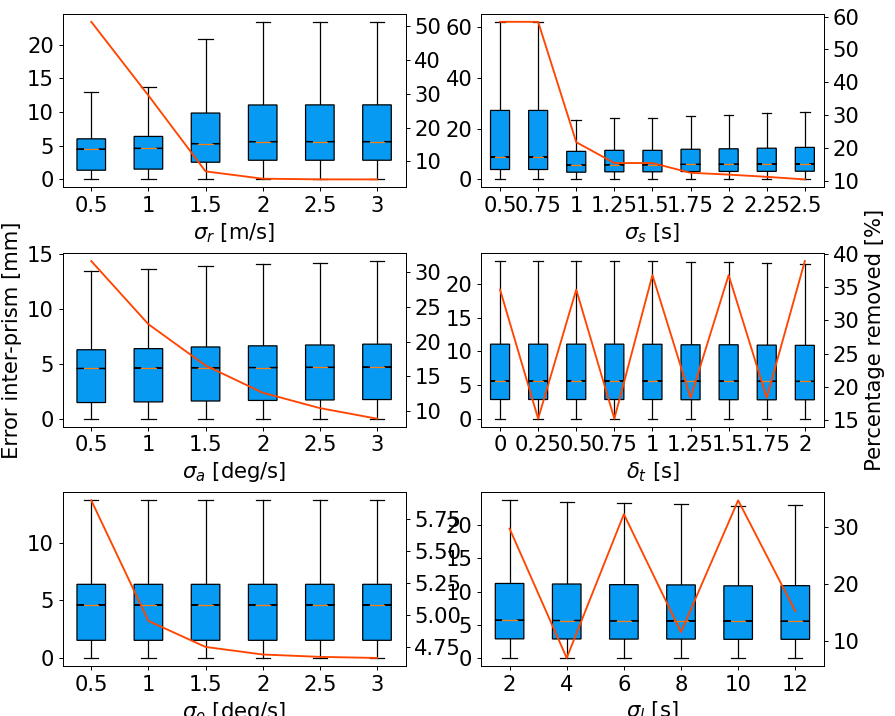

/home/norlab/python3-8_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/home/norlab/python3-8_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/home/norlab/python3-8_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from 

In [73]:
%matplotlib notebook
# Creating figure all dataset
font_size = 12

fig = plt.figure(figsize =(10, 8))

ax1 = fig.add_subplot(321)
box = ax1.boxplot(result_sigma_r, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6], ["0.5","1","1.5","2","2.5","3"],fontsize = font_size)
colors_box = ['#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
ax1.set_xlabel("$\sigma_r$ [m/s]",fontsize = font_size)
plt.yticks(fontsize=font_size)
#ax1.set_ylabel("Error inter-prism [mm]",fontsize = font_size)
ax11 = ax1.twinx()
ax11.plot([1, 2, 3, 4, 5, 6], poo_r, color='orangered')
#ax11.set_ylabel('Percentage removed [%]',fontsize = font_size)
plt.yticks(fontsize=font_size)

ax2 = fig.add_subplot(323)
box = ax2.boxplot(result_sigma_azimuth, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6], ["0.5","1","1.5","2","2.5","3"],fontsize = font_size)
colors_box = ['#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)    
ax2.set_xlabel("$\sigma_a$ [deg/s]",fontsize = font_size)
ax2.set_ylabel("Error inter-prism [mm]",fontsize = font_size)
plt.yticks(fontsize=font_size)
ax22 = ax2.twinx()
ax22.plot([1, 2, 3, 4, 5, 6], poo_a, color='orangered')
#ax22.set_ylabel('Percentage removed [%]',fontsize = font_size)
plt.yticks(fontsize=font_size)

ax3 = fig.add_subplot(325)
box = ax3.boxplot(result_sigma_elevation, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6], ["0.5","1","1.5","2","2.5","3"],fontsize = font_size)
colors_box = ['#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
ax3.set_xlabel("$\sigma_e$ [deg/s]",fontsize = font_size)
plt.yticks(fontsize=font_size)
#ax3.set_ylabel("Error inter-prism [mm]",fontsize = font_size)
ax33 = ax3.twinx()
ax33.plot([1, 2, 3, 4, 5, 6], poo_e, color='orangered')
#ax33.set_ylabel('Percentage removed [%]',fontsize = font_size)
plt.yticks(fontsize=font_size)

ax4 = fig.add_subplot(322)
box = ax4.boxplot(result_sigma_s, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ["0.5","0.75","1","1.25","1.5","1.75","2","2.25","2.5"],fontsize = font_size)
colors_box = ['#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
ax4.set_xlabel("$\sigma_s$ [s]",fontsize = font_size)
plt.yticks(fontsize=font_size)
#ax4.set_ylabel("Error inter-prism [mm]",fontsize = font_size)
ax44 = ax4.twinx()
ax44.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], pof_s, color='orangered')
#ax44.set_ylabel('Percentage removed [%]',fontsize = font_size)
plt.yticks(fontsize=font_size)

ax5 = fig.add_subplot(324)
box = ax5.boxplot(result_delta_t, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ["0","0.25","0.5","0.75","1","1.25","1.5","1.75","2"],fontsize = font_size)
colors_box = ['#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
ax5.set_xlabel("$\delta_t$ [s]",fontsize = font_size)
#ax5.set_ylabel("Error inter-prism [mm]",fontsize = font_size)
plt.yticks(fontsize=font_size)
ax55 = ax5.twinx()
ax55.plot([1, 2, 3, 4, 5, 6, 7, 8, 9], poeoo_d, color='orangered')
ax55.set_ylabel('Percentage removed [%]',fontsize = font_size)
plt.yticks(fontsize=font_size)

ax6 = fig.add_subplot(326)
box = ax6.boxplot(result_sigma_l, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3, 4, 5, 6], ["2","4","6","8","10","12"],fontsize = font_size)
colors_box = ['#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
ax6.set_xlabel("$\sigma_l$ [s]",fontsize = font_size)
plt.yticks(fontsize=font_size)
#ax6.set_ylabel("Error inter-prism [mm]",fontsize = font_size)
ax66 = ax6.twinx()
ax66.plot([1, 2, 3, 4, 5, 6],poeoo_l, color='orangered')
#ax66.set_ylabel('Percentage removed [%]',fontsize = font_size)
plt.yticks(fontsize=font_size)
plt.subplots_adjust(left=0.07,
                    bottom=0.07, 
                    right=0.92, 
                    top=0.98, 
                    wspace=0.22, 
                    hspace=0.38)
#fig.tight_layout()
plt.show()
fig.savefig("./figs/ablation_test.pdf")

In [ ]:
ttfu = importlib.reload(ttfu)

# Raw data - Filtered data comparison

result_total = []

path_type = 'raw/'
path_file_type = 'nf-1-6-0-L_'
dist_prism_raw_all, _ = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, path_file_type)
result_total.append(dist_prism_raw_all)

path_type = 'filtered/'
path_file_type = ['f-2-1-1-1-6-1-L_',
                  'f-2-1-1-1-6-1-SGP-1000_']

for i in path_file_type:
    print(i)
    dist_prism_filtered_all, _ = result_prediction(Inter_distance, file_name_marker, file_name_path, path_type, i)
    result_total.append(dist_prism_filtered_all)

In [ ]:
# Creating dataset
font_size = 9
fig = plt.figure(figsize =(4.5,2.5))
ax = fig.add_subplot(111)
result = result_total
box = ax.boxplot(result, notch=True, patch_artist=True, vert = 1, showfliers=False, showmeans=False)
plt.xticks([1, 2, 3], ["Raw L \n $\mu$: "+str(round(np.median(result[0]),2))+"mm \n $\sigma$: "+str(round(np.std(result[0]),2))+"mm",
                    "Pipeline L \n $\mu$: "+str(round(np.median(result[1]),2))+"mm \n $\sigma$: "+str(round(np.std(result[1]),2))+"mm",
                    "Pipeline GP \n $\mu$: "+str(round(np.median(result[2]),2))+"mm \n $\sigma$: "+str(round(np.std(result[2]),2))+"mm"]
          ,fontsize = font_size)
colors_box = ['#069AF3', '#069AF3', '#069AF3']

for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
        
ax.set_ylabel("Error inter-prism [mm]",fontsize = font_size)
plt.yticks(fontsize=font_size)
fig.tight_layout()
plt.show()
fig.savefig("./figs/comparison_global_pre_filtering.pdf")